# Chap 10. Segmentation & Clustering

### Gestalt Theory
: Identified series of factors that predispose set of elements to be grouped

<br>

## 👉 Segmentation
: Divide the image into meaningful regions

<br>


### Evaluation 
: No objective definition of segmentation 

1️⃣ **Boundary Agreement**

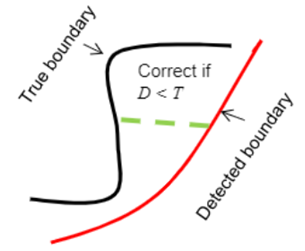


2️⃣ **Region overlap with ground truth**

: OS(S, G) = |S ∩ G| / |S ∪ G|

<br>

3️⃣ **Superpixels**

: Be content with an *oversegmentation* in which each region is very likely to be uniform

- 영상에서 특성이 비슷한 화소들의 묶음

<br>

4️⃣ **Multiple segmentations**

: Generate many segmentations of the same image
- Some **consensus** is good segmentation regions
- Task : Regions ➔ Features ➔ Labels 
- P( label | data ) = ∑ P( good segment | data ) * P( label | good segment, data )

<br>

## Main Approaches

###1️⃣ **Morphological Operations**

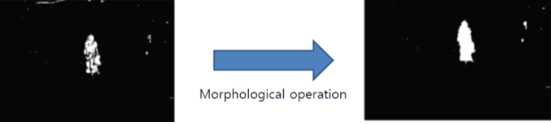

: Binary Image를 가공하여 clean한 이미지를 얻기 위해 사용
- Structuring Element( SE ) : Define the local neighborhood
  - Non-linear filtering 
  - Disk - shaped

#### 🧷 Erosion
: Replace pixel value with minimum in local neighborhood
- binary image의 물체의 크기를 축소시키거나 얇게 만드는 효과

#### 🧷 Dilation
: Replace pixel value with maximum in local neighborhood
- binary image의 물체의 크기를 키우거나 두껍게 만드는 효과

#### 📌 Opening : Erosion + Dilation
: 전체적인 물체의 윤곽선이 부드러워지고, 두께가 얇은 부분이 쪼개지고, 조그마한 점같이 존재하는 영역이 제거된다

#### 📌 Closing : Dilation + Erosion
: 전체적인 물체의 윤곽선이 부드러워지지만, 얇은 부분이 두꺼워지면서 붙는 현상이 발생하고, 조그마한 구멍이 제거된다.


### 2️⃣ **Clustering as segmentation**

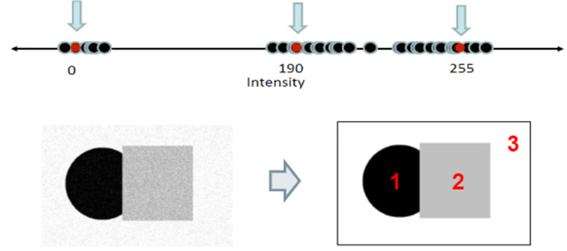

### 📌 K-means Clustering

1. Given k
2. Select initial centroids at random
3. Assign each object to the cluster with the nearest centroids
4. Compute each centroid as the mean of the objects assignmed to it
5. Repeat 3. 4. steps until no change

Pros
- Find cluster centers that minimize conditional variance 
- Simple and fast
- Easy to implement
- Works best when clusters are spherical

Cons
- Need to choose Distance Metric & Number of Clusters k 
- Sensitive to outliers
- Prone to local minima
- All clusters have the same parameters
- Can be slow : each iteration is O(KNd) for N d=dimensional points

<br>

### 📌 Mean-Shift Method
: Reigon of interest(= h) 내의 데이터를 이용하여 Mean Shift vector(= m)를 계산하면서 Center of mass(= c) 이동

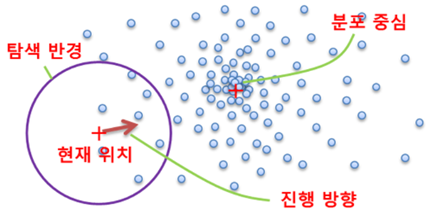


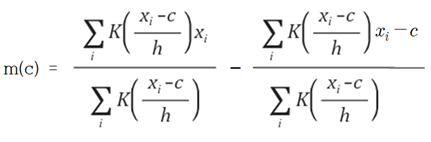

1. Find Features
2. Initialize windows at individual pixel locations
3. Perform mean shift for each window in parallel until convergence
4. Merge windows that end up near the same peak or mode

- **Attraction basin** : The Region for which all trajectories lead to the same mode
- **Cluster** : All data points in the **Attraction basin** of a mode

Pros
- Just a single parameter(= h)
  - h has a physical meaning unlike K-means
- Finds variable number of modes
- Robust to outliers
- Model-free : Does not assume any prior shape on data cluster


Cons
- Depends on window size 
- Window size( bandwidth = h ) selection is not trivial
- Computationally expensive
- Does not scale well with dimension of feature space

<br>

###3️⃣ **Graph Clustering**
- Represent tokens using a weighted graph 

  : Cut up a graph to get subgraphs with strong interior links and weaker exterior links

- Types of Graph
  - Regular Graph : All nodes of a graph have the same degree
  - Eulerian Graph : All nodes have even degree
  - Complete Graph : Every pair of vertices have edges

### 📌 Graph Cut

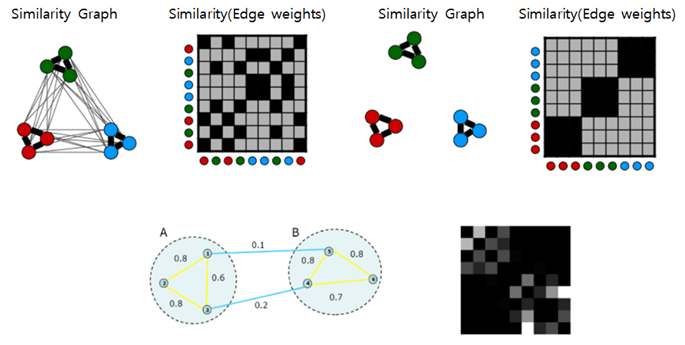



cut(A, B) : Sum of weights of all edges between A and B
    
    cut(A, B) = ∑w_ij ( i ∈ A, j ∈ B )

✏️ Min-cut : Weights of edges connecting vertices in A to vertices in B is minimum
  - Pros : Easy to solve the algorithm
  - Cons : Not satisfactory partition ( often isolates vertices )

  이상적인 방향으로 클러스터를 분류하는 가중치값들의 합보다 더 작은 가중치가 같은 클러스터안에 존재하게 된다면 분류의 방향이 잘못되게 된다. 

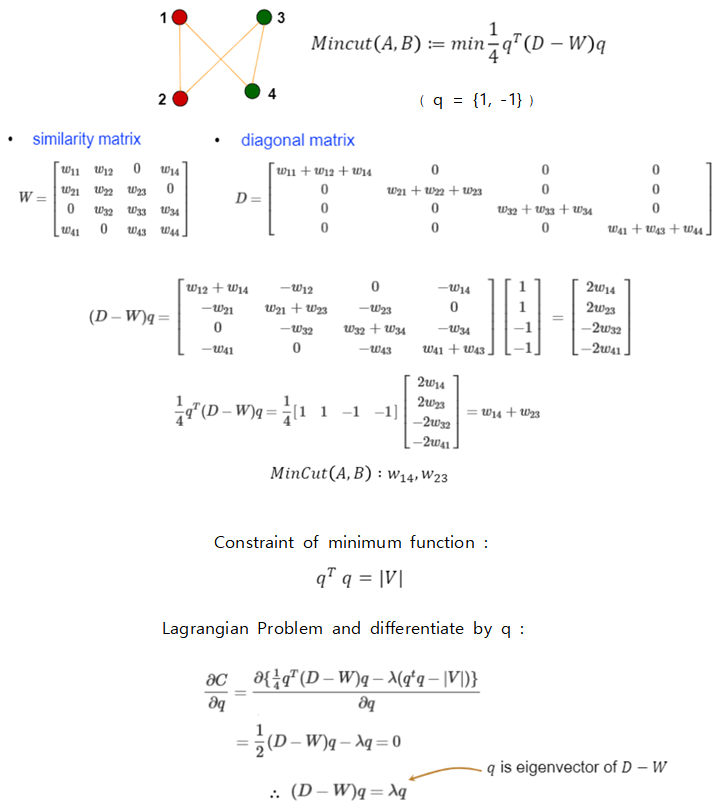


✏️ Balanced min-cut 
  
    min-cut(A, B) ( s.t. |A| = |B| : # of edges )

✏️ Ratio cut 

    Ratio-cut(A, B) = cut(A, B)(1/|A| + 1/|B|)

✏️ Normalized cut 

    Ncut(A, B) = cut(A, B)(1/vol(A) + 1/vol(B))

    - vol : sum of degree in sub-graph

<br>

### 📌 Spectral Clustering 

: Identify the minimum cut ➜ Remove edges ➜ Repeat until k clusters are identified
- Recursively partition the dataset

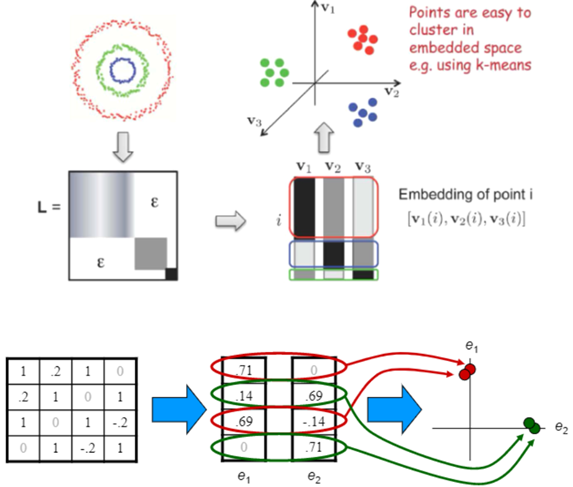

1. Build Similarity Graph
2. Compute the first k eigenvecotrs v1, ..., vk of the **Laplacian matrix**
    
        Laplacian matrix = Degree matrix - Adjacency matrix

        - Degree matrix : Diagonal matrix로 Dii = Σj Wij

3. Build the matrix V ∈ R ^ (n x k) with the **eigenvectors** as columns
4. Interpret the rows of V as new data points Zi ∈ R^k
  - Dimensionality Reduction : nxn ➜ nxk
5. Cluster the points Zi with the **K-means algorithms** in R^k


Pros
- Find cluster with non-convex boundaries
- Spectral space representation
- Resulting clusters independent of row ordering

<br>

###4️⃣ **Fitting**

: Given a model of interest, we can overcome some of the missing and noisy edges using fitting techniques

### 📌 Hough Transform 
: detected points vote on possible model parameters
- Rigid model shape 
- Single voting pass can detect multiple instances

<br>

### 📌 Deformable Contours
: fitting of curves to object boundaries
- Snakes
- Intelligent scissors 
  : interactive specification of curves clinging to object boundaries
- Level-set
  : Evolving boundaries as the zero set of a characteristic function

Pros
- Useful to track and fit non-rigid shapes
- Contour remains connected
- Possible to fill in subjective contours
- Flexibility in how energy function is defined, weighted

Cons 
- Must have decent initialization near ture boundary, may get stuck in local minimum
- Parameters of energy function must be set well based on prior information

<br>

#### ✏️ Snakes
: Represents an object boundary or some other salient image feature as a parametric curve
- An energy function E is associated with the curve

      E(C) = E_internal(C) + E_external(C) + E_constraint

- Finding object boundary = Energy minimization problem
- In the end, it completely **shrink-wraps** around the objects.

Cons
- Depends on the number and spacing of control points
- May over-smooth the boundary
- Initialization is crucial
- Not trivial to prevent curve self intersection
- May not follow topological change of objects

#### 🧷 Internal Energy

: Designed to keep the model **smooth** during deformation
- Defined within the curve or surface itself

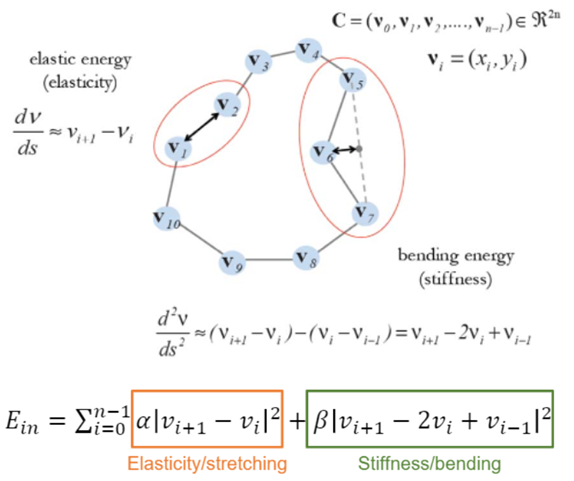

#### 🧷 External Energy
: Defined to move the model toward an object boundary or other desired features within an image
- Computed from the image data locally
- Cons : Local minima - Attracting the curve toward different image features 

       E_ex = - ∑|∇I(v)|^2 = - ∑|∇I(x,y)|^2

#### 🧷Optimization 
: Find contour C that minimizes E(C)

- Compute local minima via gradient descent
- More robust option : dynamic programming

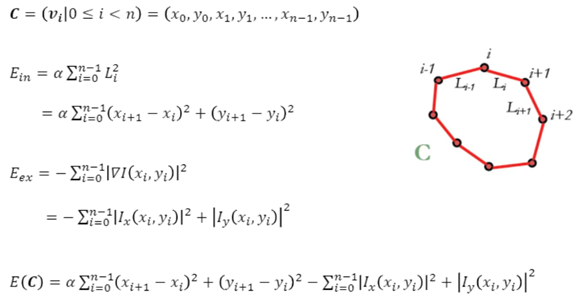

<br>

# Chap 11. Classification

- Recognition / Classification : Is this a street light?
- Detection : Where are the people?
- Identification : Is that Potala palace?
- Semantic Segmentation : What is in the scene? 
- Object Categorization : tree, mountaion, banner, building ...
- Scene Categorization : What type of scene is it?
- Activity / Event Recogntion : What are theses people doing?

## Challenges of Recoginition
- Illumination
- Deformation
- Occlusion
- Clustter
- Intraclass Variation

<br>

## 📌 Bag-of-words ( BoW models )
: **Spatial information** of local features can be ignored for object recognition 

### 🧷 Collection of local features = bag-of-features
- Deals well with occlusion
- Scale invariant
- Rotation invariant 
- Independent features between class

### 🧷 Vector Space Model
: A document(= datapoint) is a vector of counts over each word(= feature)

image.png    

- Similarity between two documents

      d( vi, vj ) = cosθ = vi·vj / ||vi||x||vj||

### 🧷 TF-IDF ( Term Frequency Inverse Document Frequency )

- Importance of words are not equal

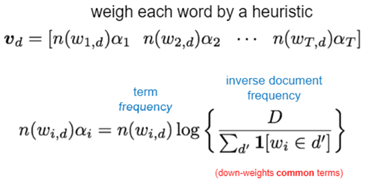

- D : 전체 문서 수
- Σ1 : 해당 단어가 들어있는 문서 수 

<br>

### 1️⃣ Dictionary Learning : Learn Visual Dictionary using clustering
1. **Feature Extraction** : 이미지로부터 feature 추출
  - Regular grid
  - Interest point detector
  - Random sampling 
  - Segmentation based patches

2. **Learn Visual Dictionary** : 추출된 feature들에 대해 Clustering을 수행하여 Cluster Center들인 Codeword들을 찾아냄. 
  - 보통 k-means Clustering 사용
  - Visual Dictionary : Provided the training set is sufficiently representative, the dictionary will be universal

### 2️⃣ Encode
3. **Codebook Generation** : 찾아진 Codeword들로 구성되는 Codebook 생성
  - Codebook은 모든 클래스의 Codeword들을 포함함

4. **Image Representation** : 각각의 이미지를 Codeword들의 Histogram으로 표현
  - Histogram 크기( bin 개수 ) = Codebook 크기(Codebook을 구성하는 Codeword 개수)
  - Quantization : Image features gets associated to a visual word( nearest cluster center )
  - Histogram : Count the number of visual word occurrences

### 3️⃣ Classify
5. **Learning and Recognition** 
  - Generative Method : 물체 클래스별 Histogram 값을 확률로서 해석하여 물체를 분류하는 것
    - 데이터를 구별하는데 사용되는 모델
    - P(x,y) = P(x|y)P(y) 
    - Naive Bayes

  - Discriminative Method : 물체 클래스별 Histogram 값을 feature vector로 해석하여 클래스 경계를 학습시키는 것
    - 새로운 데이터를 생성하는데 사용되는 모델
    - P(y|x)
    - SVM, KNN


<br>

## 📌 K-Nearest Neighobrs
: **Non-parametric** pattern classification approach
- Assign the class by **majority vote**

Cons
- Locality sensitive distance metrics
- Dimensions have different scales
- Choosing the value of k 
  - If too small, sensitive to noise points
  - If too large, neighborhood may include points from other classes
- Terrible performance at test time 
- Distance metrics on level of whole images can be very unintuitive

<br>

## 📌 Naive Bayes
- Posterior : Probability of a class Z given the observed features X

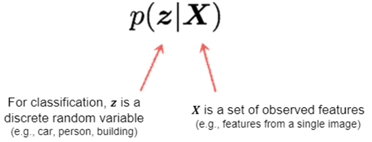

- Learn parametric model for each class 
- Compute probability of query
- Posterior can be decomposed according to **Bayes' Rule**

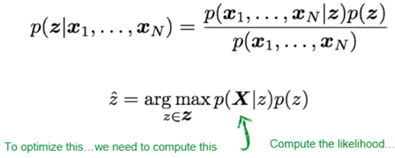

<br>

## 📌 Suport Vector Machine

- Linear Classifier

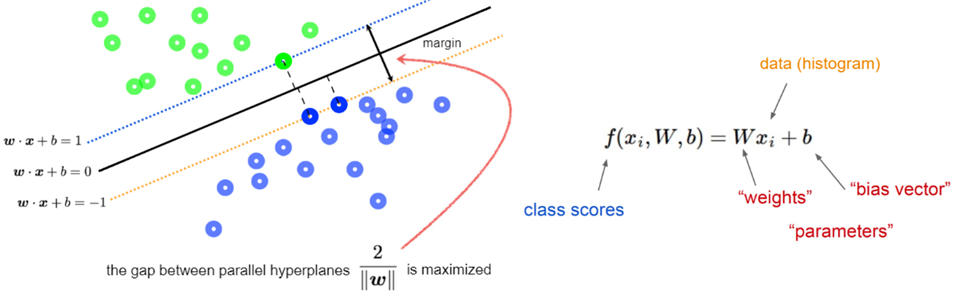

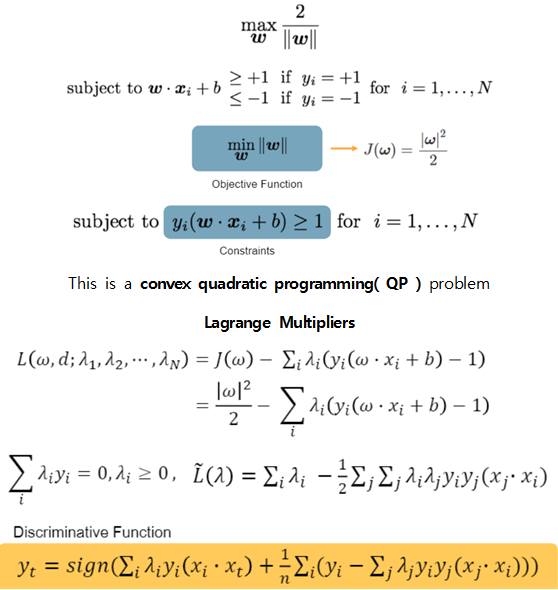

###🧷 Kernel Trick ( nonlinear Classifier )

  : The original input space can always be mapped to some higher-dimensional feature space where the training set is separable

###🧷 Soft Margin 
  
  : Allow for some misclassification 
- Robust Classiciation 
- Trade-off between the margin and the mistakes

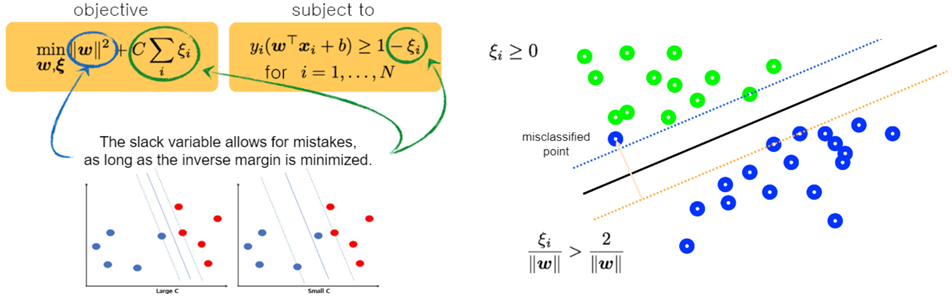